In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [346]:
df = pd.read_csv('p1_df.csv')
df_kl = pd.read_csv('p1_df_kl.csv')
del df['Unnamed: 0']
del df_kl['Unnamed: 0']
df

,ids,categories,text
0,test/14826,trade,"['asian', 'exporter', 'fear', 'damage', 'u', '..."
1,test/14828,grain,"['china', 'daily', 'say', 'eat', 'pct', 'grain..."
2,test/14829,crude,"['japan', 'revise', 'long', 'term', 'energy', ..."
3,test/14832,grain,"['thai', 'trade', 'deficit', 'widens', 'first'..."
4,test/14833,veg-oil,"['indonesia', 'see', 'cpo', 'price', 'rising',..."
...,...,...,...
10783,training/999,money-fx,"['uk', 'money', 'market', 'shortage', 'forecas..."
10784,training/9992,earn,"['knight', 'inc', 'set', 'quarterly', 'qtly', ..."
10785,training/9993,earn,"['inc', 'set', 'quarterly', 'qtly', 'div', 'ct..."
10786,training/9994,earn,"['nationwide', 'cellular', 'service', 'inc', '..."


In [347]:
# 2)Выбрать 7 наиболее крупных классов, остальные – удалить. Для каждого из оставшихся 
# классов выявить по 20 наиболее часто встречаемых слов, отобразить их в виде таблицы 
# или «облака слов». 
df_kl.head(7)

,Klass,Kol
0,earn,3964
1,acq,2350
2,money-fx,716
3,grain,578
4,crude,539
5,trade,428
6,interest,290


In [348]:
kl = list(df_kl.Klass)[:7]
kl

['earn', 'acq', 'money-fx', 'grain', 'crude', 'trade', 'interest']

In [349]:
# Оставляем только 7 наиболее крутный классов
df = df[df.categories.isin(kl)]
df = df.reset_index(drop=True)
df

,ids,categories,text
0,test/14826,trade,"['asian', 'exporter', 'fear', 'damage', 'u', '..."
1,test/14828,grain,"['china', 'daily', 'say', 'eat', 'pct', 'grain..."
2,test/14829,crude,"['japan', 'revise', 'long', 'term', 'energy', ..."
3,test/14832,grain,"['thai', 'trade', 'deficit', 'widens', 'first'..."
4,test/14841,grain,"['sri', 'lanka', 'get', 'usda', 'approval', 'w..."
...,...,...,...
8860,training/999,money-fx,"['uk', 'money', 'market', 'shortage', 'forecas..."
8861,training/9992,earn,"['knight', 'inc', 'set', 'quarterly', 'qtly', ..."
8862,training/9993,earn,"['inc', 'set', 'quarterly', 'qtly', 'div', 'ct..."
8863,training/9994,earn,"['nationwide', 'cellular', 'service', 'inc', '..."


In [350]:
# Таблица 20 наиболее часто встречаемых слов для каждого из 7 классов
df_word = pd.DataFrame(columns=kl)
for i in kl:
    df_i = df[df.categories == i]
    vec_text = CountVectorizer()
    t = vec_text.fit_transform(df_i.text.astype(str))
    df_text = pd.DataFrame({"Word": np.array(vec_text.get_feature_names()), 
                            'Kol':np.asarray(t.sum(axis=0)).ravel()})
    df_text = (df_text.sort_values(by=['Kol'], ascending=False))
    df_text = df_text.reset_index(drop=True)
    df_word[i] = df_text.Word[:20]
df_word

,earn,acq,money-fx,grain,crude,trade,interest
0,mln,said,said,said,said,said,rate
1,ct,share,bank,tonne,oil,trade,pct
2,net,dlrs,dollar,mln,mln,billion,said
3,dlrs,company,rate,wheat,price,japan,bank
4,loss,mln,market,grain,barrel,year,interest
5,shr,inc,pct,corn,crude,dlrs,market
6,said,pct,currency,year,dlrs,export,cut
7,year,corp,mln,export,opec,would,prime
8,profit,offer,exchange,pct,pct,mln,day
9,qtr,group,yen,price,year,deficit,billion


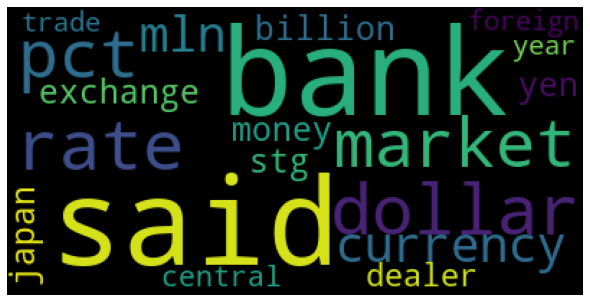

In [351]:
# Облако слов для класса money-fx
text_money = " ".join(df_word['money-fx'])
wordcloud = WordCloud().generate(text_money)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [352]:
# 4)Обработанную выборку разбить на обучающую и тестовую, настроить и обучить несколько 
# классификаторов на обучающей выборке, а на тестовой проанализировать получившуюся 
# полноту и точность. 

X_train, X_test, y_train, y_test = train_test_split(df.text, df.categories, 
                                                    test_size=0.25, random_state=42)
# Метод k-ближайших соседей
text_clf = Pipeline([('vect', CountVectorizer(max_features= 1000, stop_words = 'english')),
                    ('tfidf', TfidfTransformer(use_idf = True)),
                    ('clf', KNeighborsClassifier (n_neighbors=1)),])   
parameters = {'vect__max_features': (100,500,1000,5000,10000),
              'vect__stop_words': ('english', None),
              'tfidf__use_idf': (True, False),               
              'clf__n_neighbors': (1,3,5,7)}          
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1, cv=3)
text_clf = gs_clf.fit(X_train, y_train)
prediction = text_clf.predict(X_test)

In [353]:
# Точность
precision_score(y_test, prediction, average='macro')

0.857101152430287

In [354]:
# Полнота
recall_score(y_test, prediction, average='macro')

0.7624944239891321

In [355]:
# Полиномиальный (Мультиномиальный) Наивный Байесовский метод 
text_clf_2 = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()), ])
parameters_2 = {'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),}
gs_clf_2 = GridSearchCV(text_clf_2, parameters_2, n_jobs=-1)
gs_clf_2 = gs_clf_2.fit(X_train, y_train)
prediction_2 = gs_clf_2.predict(X_test)

In [356]:
# Точность
precision_score(y_test, prediction_2, average='macro')

0.9107619910500916

In [357]:
# Полнота
recall_score(y_test, prediction_2, average='macro')

0.9049855478606788